# Check out 2D Gaussians

Necessary imports:

In [1]:
import sys 
sys.path.append('..')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import get_field_data as gfd

Point to directories, where the data lie.

In [3]:
# Data path
scratch_dir = "/project/th-scratch/a/And.Lindner"

# Data folder
folder1="2d_gaussian_4prc"  # 4 processes
folder2="2d_gaussian_16prc"  # 16 processes
folder3="2d_gaussian_8prc"  # 8 processes
folder4="2d_gaussian_8prc_135deg"  # 8 processes at 135°

Note on the data:  
Simulated are two equal Gaussian waves with $1\mu m$ wavelength that are colldiding at a 90° or 135° angle.  
Here is a gathering of different simulations where only one state shortly after the collision is available.  
See [below](#two_steps) for a simulation analysis of two time steps.

0. Specify the file path.

1. Define which field component you want to have.
0 is $E_x$, 1 is $E_y$, 2 is $E_z$, 3 is $B_x$, etc.

2. Define which step you want to get.
The available output steps were defined in your simulation and name the prefix of the output files. 

3. Give the number of processes/patches used in the simulation.

4. Indicate the slicing of the patchwork in the two dimensions.

5. Give the shape of a patch in lattice points.

Any chosen number of processes the simulation was running on and patch shape can be given as paramters to the provided convenience function.

#### First for a simulation on 4 processes/patches:

In [40]:
path = os.path.join(scratch_dir,folder1)
component=2
step=100
n_prc=4
n_patches=[2,2]
patch_shape=(512,512)

Load the data into a variable:

In [41]:
ez=gfd.get_field2D(path,component,n_prc,patch_shape,n_patches,step)

In [42]:
ez.shape

(1024, 1024)

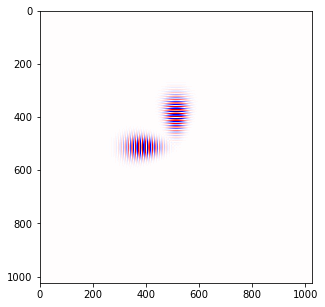

In [43]:
plt.figure(figsize=(5,5))
plt.imshow(ez, cmap="seismic")

#### Second, 16 processes:

In [44]:
path = os.path.join(scratch_dir,folder2)
n_prc=16
n_patches=[4,4]
patch_shape=(256,256)

In [45]:
ez=gfd.get_field2D(path,component,n_prc,patch_shape,n_patches,step)

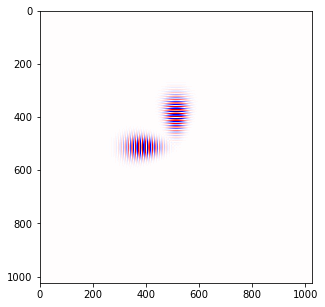

In [46]:
plt.figure(figsize=(5,5))
plt.imshow(ez, cmap="seismic")

#### Third, 8 processes with unequal (non-square) slicing.

In [47]:
path = os.path.join(scratch_dir,folder3)
n_prc=8
n_patches=[2,4]
patch_shape=(512,256)

In [48]:
ez=gfd.get_field2D(path,component,n_prc,patch_shape,n_patches,step)

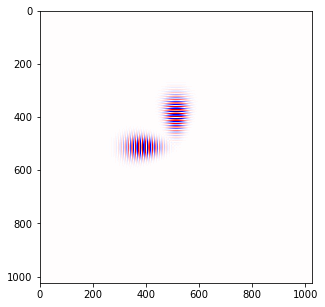

In [49]:
plt.figure(figsize=(5,5))
plt.imshow(ez, cmap="seismic")

#### Forth, the above waves colliding at a 135° angle.

In [50]:
path = os.path.join(scratch_dir,folder4)

In [51]:
ez=gfd.get_field2D(path,component,n_prc,patch_shape,n_patches,step)

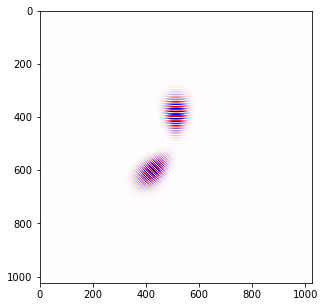

In [52]:
plt.figure(figsize=(5,5))
plt.imshow(ez, cmap="seismic")

A 3D plot:

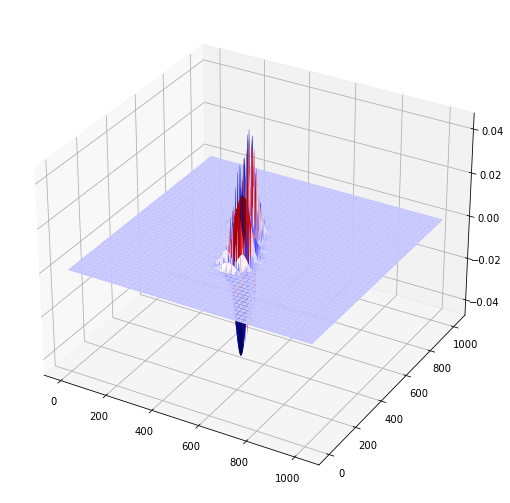

In [53]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
x=np.linspace(0,1024,1024)

X,Y=np.meshgrid(x,x)

    
ax.plot_surface(X, Y, ez[:,:], cmap='seismic')

### **Two states** of a simulation that ran on 3 processes
<a id='two_steps'></a>

In [54]:
# Data path
scratch_dir = "/project/th-scratch/a/And.Lindner"

# Data folder
folder = "2d_gauss"  # three processes, slice in x-dir

# Combine
path = os.path.join(scratch_dir,folder)

Combine both steps into one variable using the wrapper:

In [55]:
component=2
n_prc=3
n_patches=[3,1]
patch_shape=(300,900)
steps=[50,100]

In [56]:
ez=gfd.combine_steps(gfd.get_field2D,path,component,n_prc,patch_shape,n_patches,steps=steps)

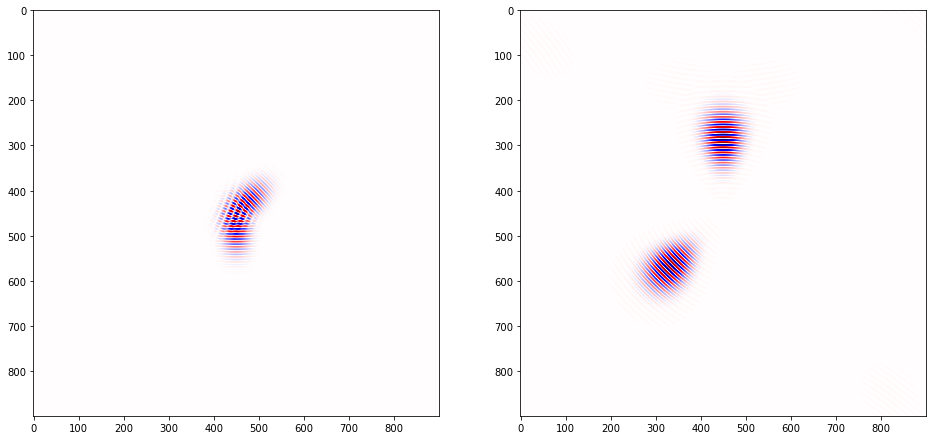

In [57]:
plt.figure(figsize=(16,9))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(ez[i], cmap="seismic")

# Notes

The x-axis is showing downwards and the y-axis to the right in the imshow plots.
This is fine in the sense that the Gaussians here are propagated in negative x *and* y direction.

This has just to be kept in mind when creating figures and axes descriptions.